In [ ]:
#import  libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [ ]:
crime=pd.read_csv('/content/crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


EDA

In [ ]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [ ]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [ ]:
# rename column
crime1=crime.rename({'Unnamed: 0':'States'},axis=1)
crime1

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


Hierarchical Clustering


In [ ]:
#customized Normalization function
# Here we can use standardized functions as well from sklearn but to show you how we can write customized function we used this code
def norm_func(i): ## function name is norm_func
  x=(i-i.min())/(i.max()-i.min())   # (Xi-min)/range (Feature Scaling), Range=max-min
  return x

In [ ]:
# Normalized data frame (only numeriacal data)
df_norm=norm_func(crime1.iloc[:,1:])  #all rows  & 1 to s colomns



In [ ]:
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


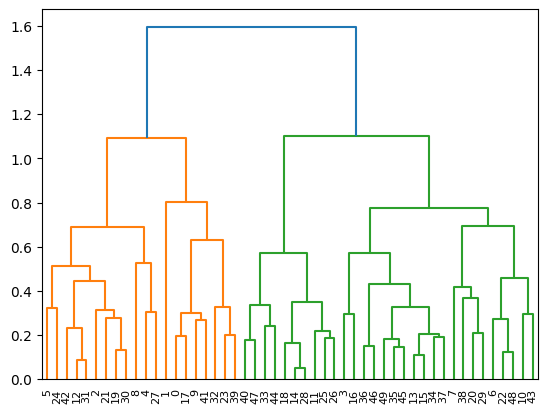

In [ ]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete')) # complete linkage

In [ ]:
# create clusters, suppose got input from customer that go for 5 clusters
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')

In [ ]:
hc

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=5)

In [ ]:
#save cluster for chart
y_hc=hc.fit_predict(df_norm) # apply fit_predict method on dataset df_norm. We will get cluster nos. in y_hc
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
y_hc

array([3, 4, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       0, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 0, 0])

In [ ]:
Clusters

,Clusters
0,3
1,4
2,1
3,0
4,1
5,1
6,0
7,0
8,1
9,3


In [ ]:
#map this cluster membership to the data points
crime1['h_clusterid']=Clusters

In [ ]:
crime1

,States,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [ ]:
crime2=crime1.sort_values('h_clusterid')
crime2.iloc[:,[0,5]]

,States,h_clusterid
49,Wyoming,0
20,Massachusetts,0
29,New Jersey,0
16,Kentucky,0
15,Kansas,0
34,Ohio,0
13,Indiana,0
35,Oklahoma,0
22,Minnesota,0
10,Hawaii,0


KMean Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Normalization / Standardisation function 
from sklearn.preprocessing import StandardScaler  # built in function for standardization
scaler = StandardScaler() # scaler is an object name of StandardScalar class, you can give any name
scaled_crime1_df = scaler.fit_transform(crime1.iloc[:,1:]) # fit_transform() is a method of StandardScalar class
scaled_crime1_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116,  1.61867696],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392,  2.4889334 ],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626, -0.1218359 ],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398, -0.99209233],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393, -0.1218359 ],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137, -0.1218359 ],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319, -0.99209233],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422, -0.99209233],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 , -0.1218359 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293,  1.61867696],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987, -0.99209233],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217,  0.74842053],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525, -0.1218359 ],
       [-0.13637203, -0.70012057, -0.0

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

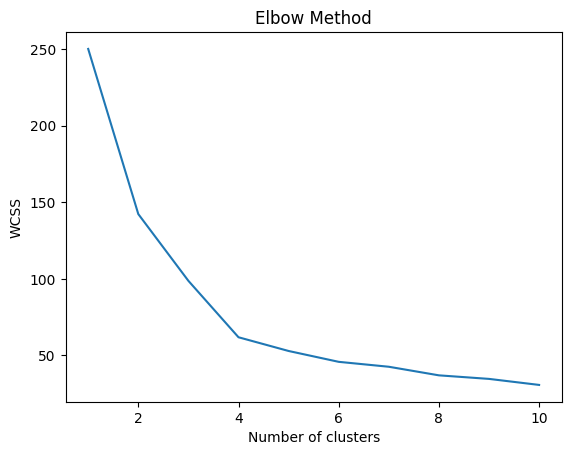

In [ ]:
wcss = [] # within cluster sum of square. Initialize WCSS and begin the loop
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,random_state=0)
    kmeans.fit(scaled_crime1_df) 
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
wcss


[250.0,
 142.2356915237204,
 98.66687275954956,
 61.85088338209116,
 52.896885907129885,
 45.81595111662375,
 42.60864950560209,
 37.000723353862696,
 34.68240696824384,
 30.75179465133982]

In [ ]:
kmeans = KMeans(n_clusters=5,random_state=0) # pass no. of clusters as 5
predict=kmeans.fit_predict(scaled_crime1_df)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
predict

array([0, 0, 3, 4, 3, 3, 2, 4, 3, 0, 2, 1, 3, 4, 1, 4, 4, 0, 1, 3, 2, 3,
       2, 0, 3, 1, 1, 3, 1, 2, 3, 3, 0, 1, 4, 4, 4, 2, 2, 0, 1, 0, 3, 2,
       1, 4, 4, 1, 2, 4], dtype=int32)

In [ ]:
clusters_new= KMeans(n_clusters=5,random_state=42)
new_predict=clusters_new.fit_predict(scaled_crime1_df)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
clusters_new.labels_

array([2, 2, 1, 4, 1, 1, 0, 4, 1, 2, 0, 3, 1, 4, 3, 4, 4, 2, 3, 1, 0, 1,
       0, 2, 1, 3, 3, 1, 3, 0, 1, 1, 2, 3, 4, 4, 4, 0, 0, 2, 3, 2, 1, 0,
       3, 4, 4, 3, 0, 4], dtype=int32)

In [ ]:
#assign cluster to dataset
crime1['clusterid_new']=new_predict

In [ ]:
crime1

,States,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new
0,Alabama,13.2,236,58,21.2,3,2
1,Alaska,10.0,263,48,44.5,4,2
2,Arizona,8.1,294,80,31.0,1,1
3,Arkansas,8.8,190,50,19.5,0,4
4,California,9.0,276,91,40.6,1,1
5,Colorado,7.9,204,78,38.7,1,1
6,Connecticut,3.3,110,77,11.1,0,0
7,Delaware,5.9,238,72,15.8,0,4
8,Florida,15.4,335,80,31.9,1,1
9,Georgia,17.4,211,60,25.8,3,2


In [ ]:
#these are stanadardized values
clusters_new.cluster_centers_

array([[-0.8115321 , -0.73783098,  0.89281033, -0.63376699, -0.99209233],
       [ 0.71788585,  1.04432228,  0.89281033,  1.18827715, -0.1218359 ],
       [ 1.4610129 ,  0.99381728, -0.84023734,  0.35649393,  1.72745902],
       [-1.0687114 , -1.11587777, -1.13334338, -1.03556337,  0.74842053],
       [-0.21016641, -0.24392264, -0.06306221, -0.09561279, -0.99209233]])

In [ ]:
crime1.groupby('clusterid_new').agg(['mean']).reset_index()

<ipython-input-32-b32829e56283>:1: FutureWarning: ['States'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  crime1.groupby('clusterid_new').agg(['mean']).reset_index()


,clusterid_new,Murder,Assault,UrbanPop,Rape,h_clusterid
,,mean,mean,mean,mean,mean
0,0,4.288889,109.888889,78.333333,15.355556,0.000
1,1,10.883333,256.916667,78.333333,32.250000,1.000
2,2,14.087500,252.750000,53.500000,24.537500,3.125
3,3,3.180000,78.700000,49.300000,11.630000,2.000
4,4,6.881818,150.636364,64.636364,20.345455,0.000


In [ ]:
crime1[crime1['clusterid_new']==0]

,States,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new
6,Connecticut,3.3,110,77,11.1,0,0
10,Hawaii,5.3,46,83,20.2,0,0
20,Massachusetts,4.4,149,85,16.3,0,0
22,Minnesota,2.7,72,66,14.9,0,0
29,New Jersey,7.4,159,89,18.8,0,0
37,Pennsylvania,6.3,106,72,14.9,0,0
38,Rhode Island,3.4,174,87,8.3,0,0
43,Utah,3.2,120,80,22.9,0,0
48,Wisconsin,2.6,53,66,10.8,0,0


In [ ]:
crime1[crime1['clusterid_new']==1]

,States,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new
2,Arizona,8.1,294,80,31.0,1,1
4,California,9.0,276,91,40.6,1,1
5,Colorado,7.9,204,78,38.7,1,1
8,Florida,15.4,335,80,31.9,1,1
12,Illinois,10.4,249,83,24.0,1,1
19,Maryland,11.3,300,67,27.8,1,1
21,Michigan,12.1,255,74,35.1,1,1
24,Missouri,9.0,178,70,28.2,1,1
27,Nevada,12.2,252,81,46.0,1,1
30,New Mexico,11.4,285,70,32.1,1,1


In [ ]:
crime1[crime1['clusterid_new']==4]

,States,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new
3,Arkansas,8.8,190,50,19.5,0,4
7,Delaware,5.9,238,72,15.8,0,4
13,Indiana,7.2,113,65,21.0,0,4
15,Kansas,6.0,115,66,18.0,0,4
16,Kentucky,9.7,109,52,16.3,0,4
34,Ohio,7.3,120,75,21.4,0,4
35,Oklahoma,6.6,151,68,20.0,0,4
36,Oregon,4.9,159,67,29.3,0,4
45,Virginia,8.5,156,63,20.7,0,4
46,Washington,4.0,145,73,26.2,0,4


In [ ]:
crime1[crime1['clusterid_new']==3]

,States,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new
11,Idaho,2.6,120,54,14.2,2,3
14,Iowa,2.2,56,57,11.3,2,3
18,Maine,2.1,83,51,7.8,2,3
25,Montana,6.0,109,53,16.4,2,3
26,Nebraska,4.3,102,62,16.5,2,3
28,New Hampshire,2.1,57,56,9.5,2,3
33,North Dakota,0.8,45,44,7.3,2,3
40,South Dakota,3.8,86,45,12.8,2,3
44,Vermont,2.2,48,32,11.2,2,3
47,West Virginia,5.7,81,39,9.3,2,3


DB-Scan

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


In [ ]:
crime=pd.read_csv('/content/crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [ ]:
print(crime.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB
None


In [ ]:
crime.drop(['Unnamed: 0'],axis=1,inplace=True) # drop   Unnamed: 0 column as its string
crime

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [ ]:
array=crime.values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [ ]:
stscaler=StandardScaler() #apply standardization on dataset
X=stscaler.fit_transform(array)

In [ ]:
dbscan=DBSCAN(eps=2,min_samples=4) # creating instance  dbscan of DBSCAN class with eps and min_samples parameters
dbscan.fit(X)

DBSCAN(eps=2, min_samples=4)

In [ ]:
dbscan.labels_ #noise samples are -1 .first1,3,4 data pts belongs in cluster0 .oonly 1 cluster formed

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [ ]:
dbscan=DBSCAN(eps=0.8,min_samples=2)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=2)

In [ ]:
dbscan.labels_  #-1= noise samples & total 6 clusters are formed

array([ 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  2,  1,  1,  1, -1,
        0,  1,  3, -1,  3,  1,  4, -1,  1,  1, -1,  1, -1,  3,  2, -1,  1,
        1,  1,  5,  1, -1,  4,  1, -1, -1,  5, -1,  1,  5,  1,  1,  1])